# OpenCV Assignment

**Acknowledgements:** The following assignment is based on GeeksforGeeks [tutorials](https://www.geeksforgeeks.org/opencv-python-tutorial/). 
This assignment is a quick introduction to the vast capabilities of the opencv library. It is highly recommended you also peruse through these tutorials in addition to this.

## What is OpenCV?

OpenCV is a popular open-source library for both computer vision, machine learning, and image processing used by both industry and academia to solve image processing problems. It can be used in C++, Java and Python (the language of our focus). It can do anything from manipulating images for pre-processing to running machine learning models such as SVM's to identify hand-written letters. Furthermore, this library is highly optimized for numerical operations and uses numpy arrays to represent images.

## Configuring OpenCV

To install opencv for python, run `pip install opencv-python`. To see other installation options visit these tutorials for [Windows](https://www.geeksforgeeks.org/how-to-install-opencv-for-python-in-windows/), [Linux](https://www.geeksforgeeks.org/how-to-install-opencv-for-python-in-linux/) and, [Anaconda](https://www.geeksforgeeks.org/set-opencv-anaconda-environment/).

Once you've installed opencv, run the block below.

**Note:** This version of opencv-python is CPU-only by default. It is possible to GPU-accelerate opencv if you have a compatible Nvidia graphics card and build from OpenCV sources. Procedure varies drastically based on numerous factors such as GPU architecture, CUDA and CUDnn versions, and more so it is recommended only if you're seasoned enough with building custom binaries and you have a need to use a GPU-accelerated version of OpenCV. Do your research before attempting to build.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Reading, Writing and Displaying Image Media

### 🚨🚨**WARNING**🚨🚨 OPENCV BY DEFAULT REPRESENTS IMAGES AS BGR (AS OPPOSED TO RGB) FOR ALL OPERATIONS. 
If you're scratching your head as to why an image colourspace appears funky, that's most likely why.

### Reading, Writing and Displaying an Image

To read in a single image, run the following

In [2]:
apple_img = cv2.imread('../.media/apple.jpg') # loads in image as BGR numpy array

OpenCV also has a function to show an image called `imshow`, which creates a new window to display your image. Unfortunately Jupyter Notebooks do not support new windows.

Instead we will run the following command

In [3]:
!python opencv_helper.py -f read_image -p ../.media/apple.jpg -d True   

Which opens a new window showing the picture of our apple.

To see what this command does exactly, open opencv_helper.py in the same folder as this jupyter notebook. The relevant lines are as follows

```python

def show_image(name: str, img): # helper function to show image
    cv2.imshow(name, img) # shows image
    cv2.waitKey(0) # waitkey function controls time to show image. Will close image either once time expires (number passed is in ms) or use presses key

def read_image(name: str, turn_image_on : bool):
    img = cv2.imread(name)
    
    if turn_image_on:
        show_image(name, img)
```

To close the window, press any key

Alternatively you can use matplotlib to show the image as follows

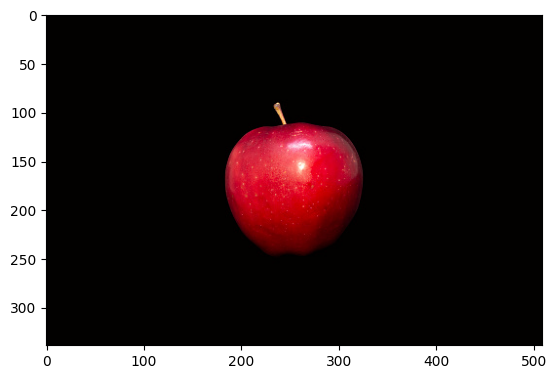

In [4]:
mat_img = cv2.cvtColor(apple_img, cv2.COLOR_BGR2RGB) #HINT: great way to convert an image between colour spaces!

plt.imshow(mat_img)

Going back to the numpy tutorial, let's say we wanted to save our mask of our apple as a .png -

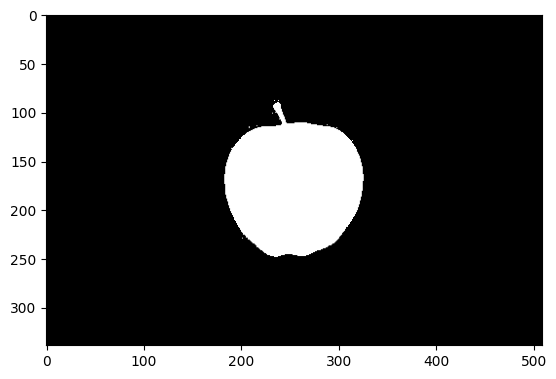

In [5]:
mask = np.where(apple_img < 10, 0, 255) #thresholding all pixel values with less than 10 to zero, other wise make it "white"
mask = mask[:,:,0] | mask[:,:,1] | mask[:,:,2] #2d mask created by oring all channels together
mask = np.moveaxis(np.array([mask,mask,mask]), 0, -1)

plt.imshow(mask)

Run to following to save the image,

In [6]:
cv2.imwrite('../.media/apple_mask.png', mask)

True

You can now see the newly generated `apple_mask.png` under `.media/`! Keep the mask image for now, we will need it later 

### Reading, Writing and Displaying Video

The natural next step in learning OpenCV is reading, writing and displaying video. 

The command below live-streams your webcam. If you want load in your own video file (i.e. .mp4), replace `0` with your own path to the video file. To specify a specific play back frame rate pass `-r <fps number>` or `-fps <fps number>`

In [9]:
!python opencv_helper.py -f play_video -p 0

The command above runs the relevant code snippet as follows -

```python
def play_video(name: str, frame_rate=float):
    
    waitkey_ms = fps_to_ms(frame_rate)
    
    if name.isdigit():
        cap = cv2.VideoCapture(int(name)) # either capture from webcam
    else:                                 # or
        cap = cv2.VideoCapture(name)      # capture from specified video
        
    if not cap.isOpened(): # throws error if capture object isn't open
        print("Error opening video file")
                
    while (cap.isOpened()): # while capture object is open
        
        ret, frame = cap.read() # ret: if frame is valid, frame: actual image array
        if ret == True:
            cv2.imshow(name, frame) # show frame
            if cv2.waitKey(waitkey_ms) == ord('q'): #quit when 'q' is pressed.
                break
        else:
            break
```

Awesome right? Now let's look at writing a video!

To write a video, run the following command,

**Note:** If you want to specify where to save your video file, add flag `-s <insert save path and file name>.mp4`

In [16]:
!python opencv_helper.py -f write_video -p 0 -r 30.0 -d True